# Iris Plant Classification Using K-Nearest Neighbors

## Part #0: Problem Statement and Import Libraries

The data set contains 3 classes of 50 instances each, where each class referes to a type of iris plant. The attribute to be predicted is the class of the iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolor, 3. Iris Virginica


There are 4 features:


1. sepalLength: sepal length in cm
2. sepalWidth: spepal width in cm
3. petalLength: petal length in cm
4. petalWidth: petal width in cm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# STEP #1: IMPORT DATA

In [2]:
df = pd.read_csv('Data\iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step #2: Explore/Visualize the Data

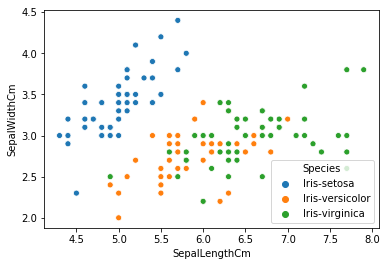

In [3]:
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = df);

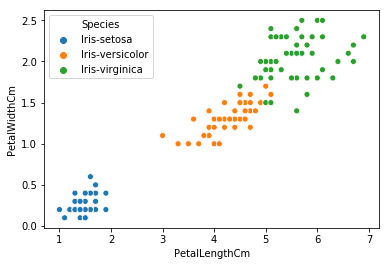

In [4]:
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = df);

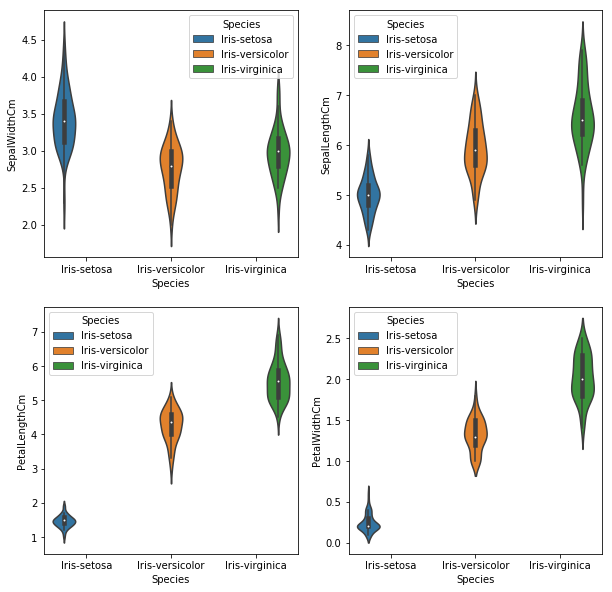

In [44]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', hue = 'Species', data = df)
plt.subplot(2, 2, 2)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', hue = 'Species', data = df)
plt.subplot(2, 2, 3)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', hue = 'Species', data = df)
plt.subplot(2, 2, 4)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', hue = 'Species', data = df);

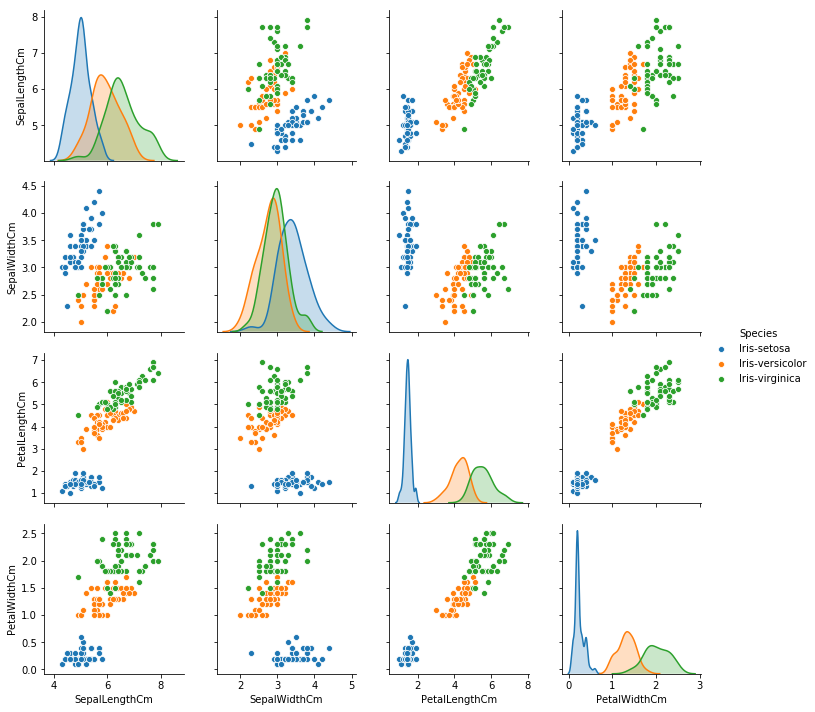

In [45]:
sns.pairplot(df, hue='Species');

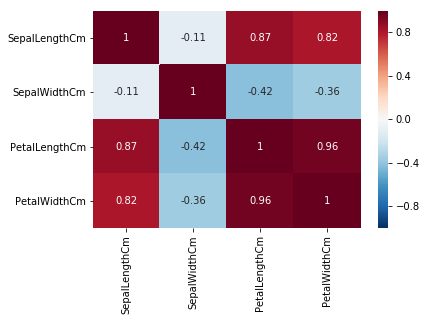

In [17]:
df_corr = df.corr()
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, cmap="RdBu_r");

## Step #3: Data Cleaning

In [18]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [20]:
X = df.iloc[:, 0:4].values

In [24]:
y = df.iloc[:, 4].values

In [25]:
X.shape, y.shape

((150, 4), (150,))

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25)

In [54]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((112, 4), (112,), (38, 4), (38,))

## Step #4: Train the Model

In [70]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

## Step #5: Evaluate the Model

In [71]:
y_pred = clf.predict(X_test)

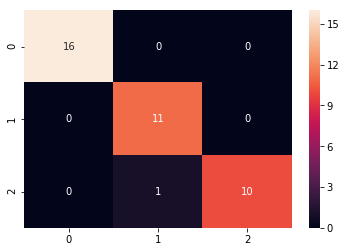

In [72]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

In [63]:
print(round(accuracy_score(y_test, y_pred) * 100, 2), "%")

94.74 %


In [59]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.91      0.91      0.91        11

      micro avg       0.95      0.95      0.95        38
      macro avg       0.94      0.94      0.94        38
   weighted avg       0.95      0.95      0.95        38

